# Time Series: Data Visulation

1. Line Plot
2. Bar Plot
3. Area Plot
4. Heat Maps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
df = pd.read_excel('data/Debourgh-Sales.xlsx', sheet_name='Sheet2', engine='openpyxl').drop('Unnamed: 2', axis=1)

df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
Years    108 non-null datetime64[ns]
Sales    108 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


### Line Plot

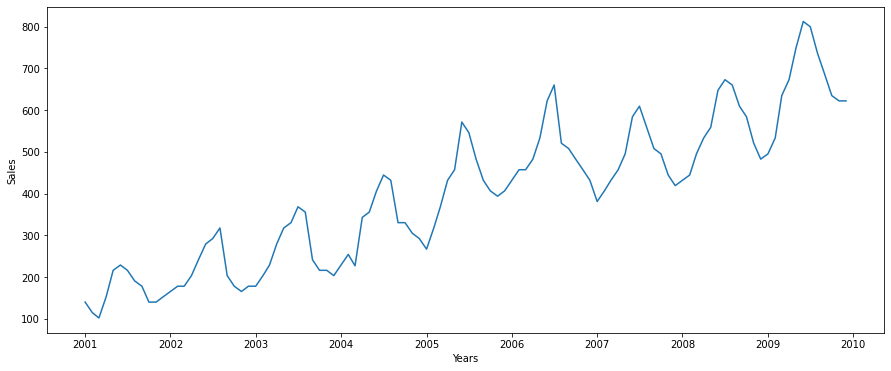

In [5]:
# Using Seaborn
plt.figure(figsize=(15, 6))

sns.lineplot(x='Years', y='Sales', data=df)
plt.show()

In [6]:
df.set_index('Years', inplace=True)

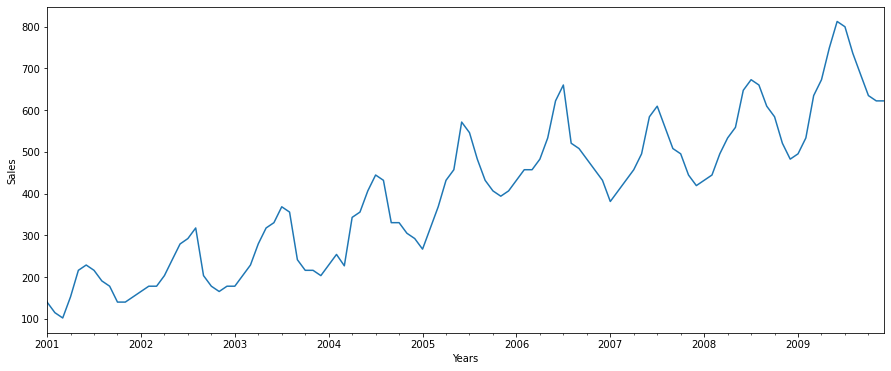

In [12]:
# Using Pandas
df.plot(figsize=(15,6), legend=False)
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [13]:
# Back to Normal
df.reset_index(inplace=True)

In [14]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


### Line Plot with Hue

In [16]:
df['Quarter'] = df['Years'].dt.quarter
df['Year'] = df['Years'].dt.year

In [17]:
df.head()

,Years,Sales,Quarter,Year
0,2001-01-01,139.7,1,2001
1,2001-02-01,114.3,1,2001
2,2001-03-01,101.6,1,2001
3,2001-04-01,152.4,2,2001
4,2001-05-01,215.9,2,2001


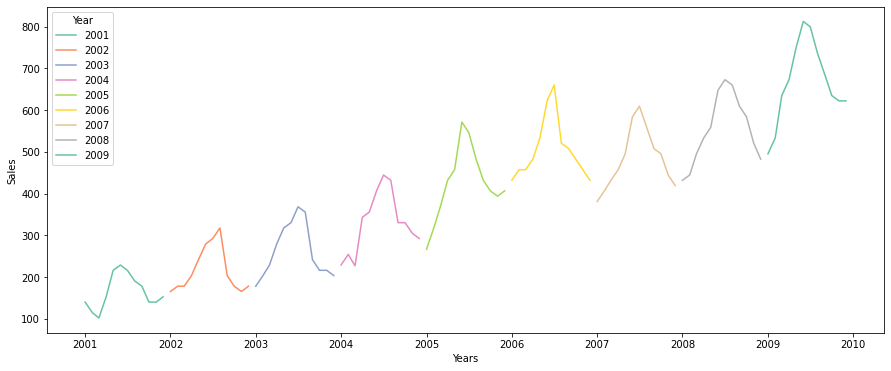

In [19]:
# Using Seaborn
plt.figure(figsize=(15, 6))

sns.lineplot(x='Years', y='Sales', hue='Year', palette='Set2', data=df)
plt.show()

### Area Plot

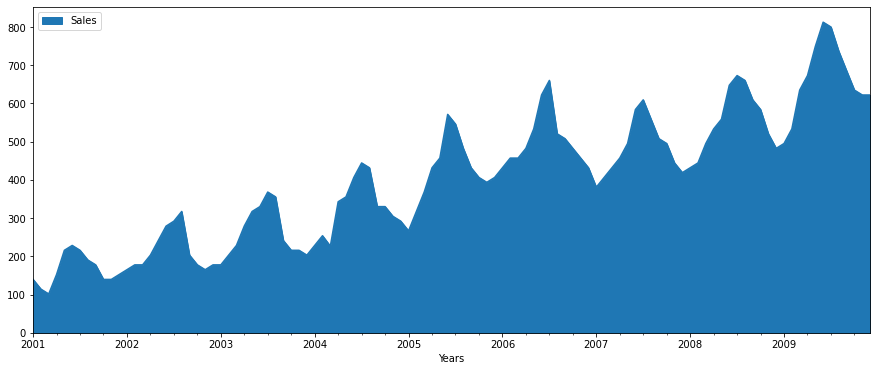

In [26]:
# Using Pandas
df.plot(kind='area', x='Years', y='Sales', figsize=(15, 6))
plt.show()

### Bar Plot

In [31]:
df_sales_by_year = df[['Sales', 'Year']].groupby(['Year']).sum().reset_index()

df_sales_by_year.head(2)

,Year,Sales
0,2001,1968.5
1,2002,2577.8


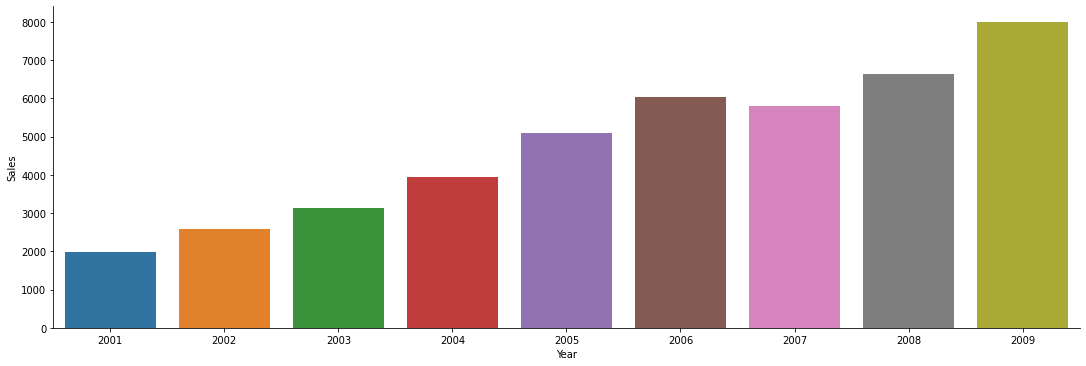

In [35]:
# Using Seaborn
sns.catplot(kind='bar', x='Year', y='Sales', data=df_sales_by_year, aspect=3)
plt.show()

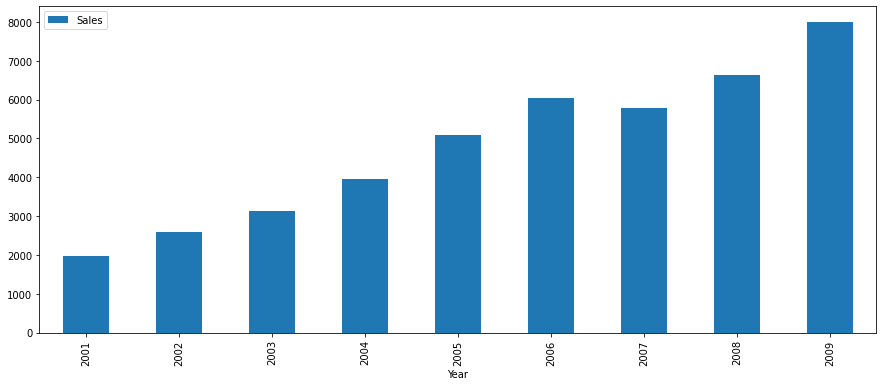

In [39]:
# Using Pandas
df_sales_by_year.plot(kind='bar', x='Year', y='Sales', figsize=(15, 6))
plt.show()

### Stacked Bar Plot

In [43]:
df_sales_by_year_quarter = df[['Sales', 'Year', 'Quarter']].groupby(['Year', 'Quarter']).sum()

df_sales_by_year_quarter.head(6)

Sales
Year Quarter       
2001 1        355.6
     2        596.9
     3        584.2
     4        431.8
2002 1        520.7
     2        723.6

In [50]:
sales.shape

(36, 1)

In [57]:
# 1st Way
sales = df_sales_by_year_quarter.values
df_sales = pd.DataFrame(sales.reshape(9, 4), index=list(range(2001, 2010)), columns=['Q1', 'Q2', 'Q3', 'Q4'])

df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


In [58]:
# 2nd Way (Easy Way: No Reshaping)
df_sales = pd.pivot_table(df_sales_by_year_quarter, index='Year', columns='Quarter', values='Sales')
df_sales.columns = ['Q1', 'Q2', 'Q3', 'Q4']

df_sales

,Q1,Q2,Q3,Q4
Year,,,,
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


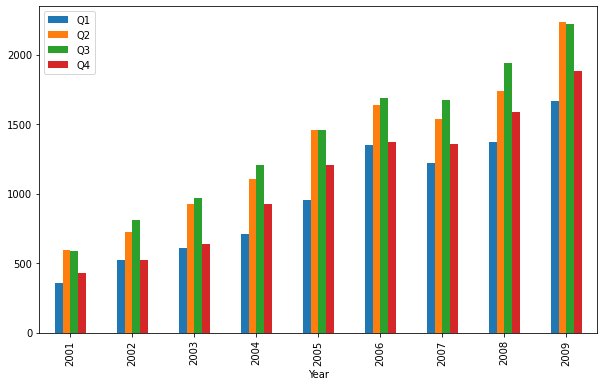

In [60]:
# Using Pandas
df_sales.plot(kind='bar', figsize=(10, 6))
plt.show()

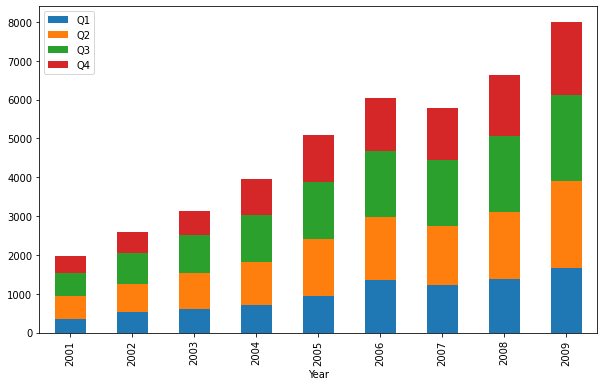

In [65]:
# Using Pandas
df_sales.plot(kind='bar',stacked=True, figsize=(10, 6))
plt.show()

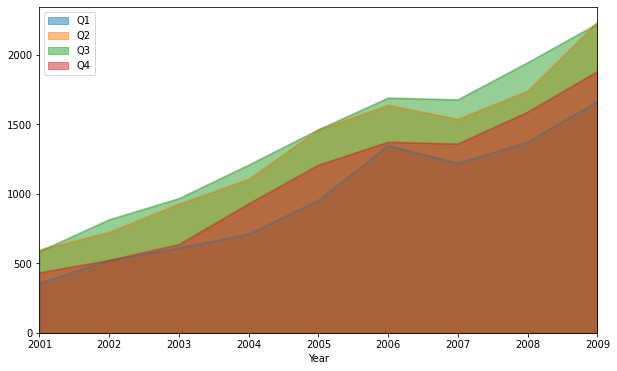

In [67]:
# Using Pandas
df_sales.plot(kind='area',stacked=False, figsize=(10, 6))
plt.show()

### Heat Maps

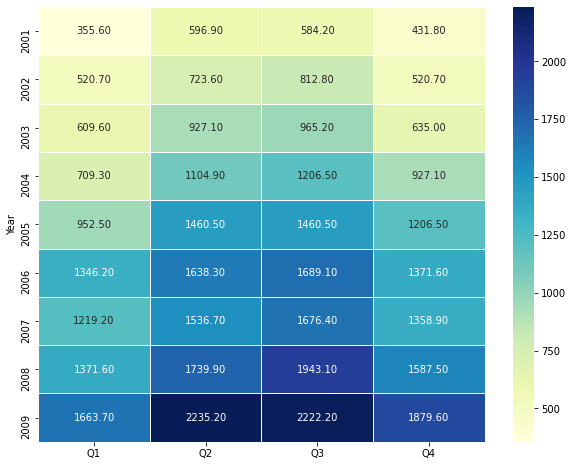

In [74]:
# Using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_sales, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=1)
plt.show()